# Analysis of Births in the United States
   *By Abasifreke Nkanang*
   

### Introduction
In this project, I am going to conduct an analysis of birth dates in the the United States of America from the year 1994 up till 2014.
The **Aim of the analysis** is to determine the relative popularity of birth dates in the U.S, and also to gain insights on the trend in births from month to year. This analysis will also help determine the distribution of births throughout the time frame in study. This analysis will also aim to gain any other insights relevant to this context. 

### Contents
1. [Data source](#data_source)
2. [Importing packages](#importing_packages)
3. [Accessing and importing the dataset](#access_and_inspect)
4. [Data cleaning and preparation](#data_clean_and_prep)
5. [Analysis and Visualization](#data_analysis)
6. [Conclusion](#conclusion)

<a id="data_source"></a>
### Source

The dataset on which this analysis was done was obtained from two sources;<br> 
The U.S National Center for Health Statistics, with data range from (1994 - 2003) <https://github.com/fivethirtyeight/data/blob/master/births/US_births_1994-2003_CDC_NCHS.csv>, and <br>
The U.S Social Security Administration, with data range from (2004 - 2014) <https://github.com/fivethirtyeight/data/blob/master/births/US_births_2000-2014_SSA.csv>.

The two CSV files were downloaded and merged manually into one CSV file named "US_births_1994-2014.csv".


<a id="importing_packages"></a>
### Importing all the needed packages
Before analysis, I prefer to import all the packages i would need. Later in the analysis, If i need to use any package that i had not imported, I will just add another import statement here. 
I also plan to embed all my visualizations, by making use of the matplotlib magic keyword.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id="access_and_inspect"></a>
### Accessing and inspecting the dataset
The dataset named _"US_births_1994-2014.csv"_  was obtained by merging the two csv files downloaded from the data sources, and will be read and inspected using pandas.

In [2]:
US_births = pd.read_csv("US_births_1994-2014.csv")
US_births.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [3]:
US_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           7670 non-null   int64
 1   month          7670 non-null   int64
 2   date_of_month  7670 non-null   int64
 3   day_of_week    7670 non-null   int64
 4   births         7670 non-null   int64
dtypes: int64(5)
memory usage: 299.7 KB


In [4]:
US_births.columns

Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object')

In [5]:
US_births.index

RangeIndex(start=0, stop=7670, step=1)

<a id="data_clean_and_prep"></a>
### Data cleaning and preparation

#### checking for missing values

In [6]:
US_births.isna().sum()

year             0
month            0
date_of_month    0
day_of_week      0
births           0
dtype: int64

This shows that the dataset does not have any missing values. So up next, I will check if there are any duplicate data records in the dataset.

#### checking for duplicates

In [7]:
US_births.duplicated().sum()

0

In [8]:
US_births.duplicated(["year", "month", "date_of_month", "day_of_week"]).sum()

0

This shows that there are no duplicate records in the dataset. I am now going to create a new column named _"full_date"._

#### creating new  columns

In [9]:
US_births.columns

Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object')

In [10]:
US_births["full_date"] = US_births["year"].astype(str) +"-"+ US_births["month"].astype(str) + "-" + US_births["date_of_month"].astype(str)

In [11]:
US_births.full_date.head()

0    1994-1-1
1    1994-1-2
2    1994-1-3
3    1994-1-4
4    1994-1-5
Name: full_date, dtype: object

With this done, I need to change the format of the full_date column, from **object** to **datetime**. 

In [12]:
US_births["full_date"] = pd.to_datetime(US_births["full_date"])

In [13]:
US_births[["full_date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   full_date  7670 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 60.0 KB


In [14]:
US_births.full_date.head()

0   1994-01-01
1   1994-01-02
2   1994-01-03
3   1994-01-04
4   1994-01-05
Name: full_date, dtype: datetime64[ns]

<a id="data_analysis"></a>
### Analysis and visualization

First of all, I will create a pivot table to summarize the average births for each day of a month.

In [15]:
Avg_births_per_Month_Day = US_births.pivot_table(values="births", index="date_of_month", columns="month", aggfunc=np.mean)
Avg_births_per_Month_Day.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
date_of_month,,,,,,,,,,,,
1,7826.761905,10969.714286,11166.428571,10335.333333,11046.142857,11197.952381,11897.476190,11824.380952,10962.666667,11771.238095,11400.904762,11293.333333
2,9356.238095,10999.238095,10840.952381,11049.380952,11160.190476,11384.952381,11874.761905,11628.619048,11042.238095,11631.952381,11128.095238,11237.619048
3,10869.476190,10877.761905,11114.523810,10943.952381,10944.380952,11290.047619,11352.285714,11367.333333,11163.047619,11726.809524,11168.714286,11194.142857
4,11064.476190,10943.571429,11026.666667,11263.619048,10746.380952,11261.666667,8824.523810,11604.571429,11266.761905,11531.666667,11172.380952,11037.761905
5,10991.714286,10727.428571,11018.476190,10934.571429,11108.095238,11207.142857,10442.095238,11649.809524,11488.761905,11312.333333,11238.761905,11189.809524


In [16]:
Avg_births_per_Month_Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       31 non-null     float64
 1   2       29 non-null     float64
 2   3       31 non-null     float64
 3   4       30 non-null     float64
 4   5       31 non-null     float64
 5   6       30 non-null     float64
 6   7       31 non-null     float64
 7   8       31 non-null     float64
 8   9       30 non-null     float64
 9   10      31 non-null     float64
 10  11      30 non-null     float64
 11  12      31 non-null     float64
dtypes: float64(12)
memory usage: 3.1 KB


With that done, I decide to change my column names to the abbreviations for each month.

In [17]:
months_abbrev_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Avg_births_per_Month_Day.columns = months_abbrev_list
Avg_births_per_Month_Day.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
date_of_month,,,,,,,,,,,,
1,7826.761905,10969.714286,11166.428571,10335.333333,11046.142857,11197.952381,11897.476190,11824.380952,10962.666667,11771.238095,11400.904762,11293.333333
2,9356.238095,10999.238095,10840.952381,11049.380952,11160.190476,11384.952381,11874.761905,11628.619048,11042.238095,11631.952381,11128.095238,11237.619048
3,10869.476190,10877.761905,11114.523810,10943.952381,10944.380952,11290.047619,11352.285714,11367.333333,11163.047619,11726.809524,11168.714286,11194.142857
4,11064.476190,10943.571429,11026.666667,11263.619048,10746.380952,11261.666667,8824.523810,11604.571429,11266.761905,11531.666667,11172.380952,11037.761905
5,10991.714286,10727.428571,11018.476190,10934.571429,11108.095238,11207.142857,10442.095238,11649.809524,11488.761905,11312.333333,11238.761905,11189.809524


In [18]:
Avg_births_per_Month_Day.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
date_of_month,,,,,,,,,,,,
27,10857.714286,10898.380952,10937.238095,10694.428571,10720.476190,11632.904762,11447.476190,11781.952381,11906.142857,11067.761905,9769.714286,11724.476190
28,10874.523810,11101.190476,11088.761905,10830.952381,10833.380952,11597.095238,11645.142857,11909.619048,11594.095238,11142.000000,10140.523810,11901.000000
29,10611.000000,10512.200000,10906.285714,10767.047619,10823.190476,11386.523810,11626.952381,11977.095238,11613.476190,11056.428571,10808.952381,12003.904762
30,10793.761905,NaN,10742.809524,10772.428571,10943.333333,11579.904762,11642.428571,11845.714286,11531.476190,10871.666667,10897.809524,11932.238095
31,10927.238095,NaN,10806.523810,NaN,10757.428571,NaN,11564.000000,11592.380952,NaN,10029.952381,NaN,10433.380952


Perfect!!.
Average births in all invalid dates like February 30, are considered as nulls.
To gain some insights on the popularity of date births, I would plot a calendar heatmap using seaborn and matplotlib.

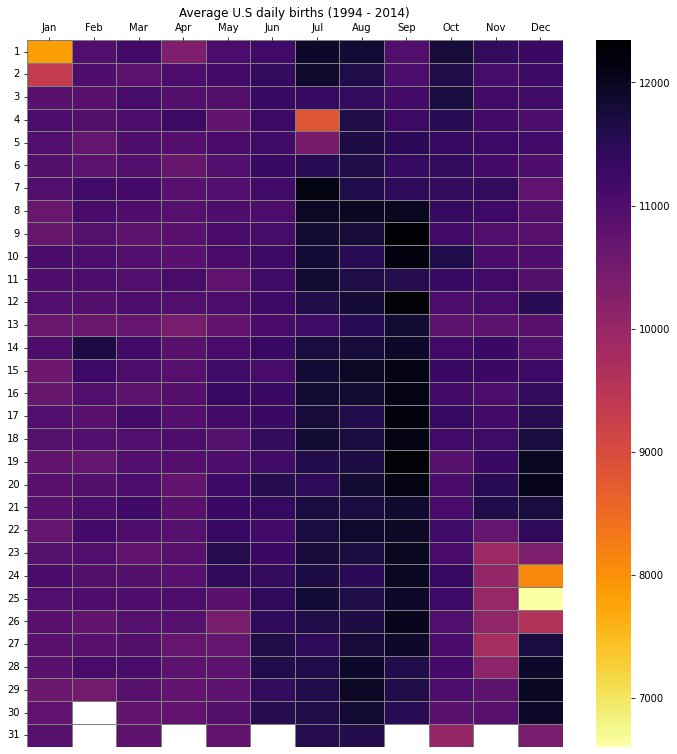

In [29]:
ax = sns.heatmap(Avg_births_per_Month_Day, xticklabels=1, yticklabels=1, cmap="inferno_r", linewidths=.7, linecolor="gray")
figure = plt.gcf()  #getting the current plot
figure.set_size_inches(12, 13)  #adjusting the plot size
ax.xaxis.tick_top()  #plotting the x-axis ticks at the top of the plot
plt.ylabel(None) 
plt.title("Average U.S daily births (1994 - 2014)")
figure.savefig("Images/calendar_heatmap.png")
plt.show()

From the heatmap, We can observe that the most popular birth dates occur in September, during the second and third weeks, and in July, while the least popular birth dates occur during Christmas, New year, and Thanksgiving.  

Next, I intend to determine the popularity of birth month by using the average births for each month. I decided on using the average births rather than the total births. This was because some months have more days than others, and the total births for each month would not convey the actual popularity. 

First of all, I am calculating the average monthly births for each month throughout the entire time frame.

In [20]:
US_births_per_month_year = US_births[["month", "year", "births"]]  #creating a new dataframe containing only the month, year, and births columns from the US_births dataframe
US_births_per_month_year.head()

,month,year,births
0,1,1994,8096
1,1,1994,7772
2,1,1994,10142
3,1,1994,11248
4,1,1994,11053


In [21]:
Sum_births_per_month_year = US_births_per_month_year.groupby(["month", "year"]).sum() #grouping by the month and year, and summing the births
Sum_births_per_month_year.head()

births
month year        
1     1994  320705
      1995  316013
      1996  314283
      1997  317211
      1998  319340

In [22]:
Avg_monthly_births= Sum_births_per_month_year.groupby("month").mean()  #grouping by month, and finding the mean of births
Avg_monthly_births = Avg_monthly_births.reset_index()  #resetting the index of the dataframe
Avg_monthly_births["month"] = months_abbrev_list
Avg_monthly_births.head()

,month,births
0,Jan,332348.666667
1,Feb,310080.809524
2,Mar,340350.857143
3,Apr,326225.380952
4,May,341684.142857


With that done, I would then calculate the average daily births for each year.

In [23]:
Avg_daily_births_per_month = US_births_per_month_year.groupby("month")["births"].mean()  #grouping by month and year, and finding the mean of births
Avg_daily_births_per_month = Avg_daily_births_per_month.reset_index()  #resetting the index of the dataframe
Avg_daily_births_per_month["month"] = months_abbrev_list
Avg_daily_births_per_month.head()

,month,births
0,Jan,10720.924731
1,Feb,10980.939292
2,Mar,10979.059908
3,Apr,10874.179365
4,May,11022.069124


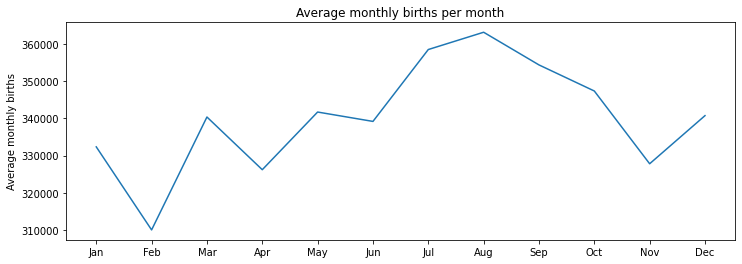

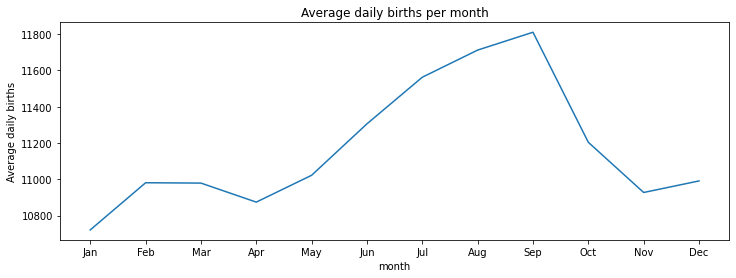

In [31]:
#plotting a line chart representing the average monthly births
axs1 = sns.lineplot(x="month", y="births", data=Avg_monthly_births)
figure = plt.gcf()
figure.set_size_inches(12, 4)
plt.xlabel(None)
plt.ylabel("Average monthly births")
plt.title("Average monthly births per month")
figure.savefig("Images/avg_monthly_births.png")
plt.show()

#plotting a line chart representitng the average daily births for each month
axs2 = sns.lineplot(x="month", y="births", data=Avg_daily_births_per_month)
figure = plt.gcf()
figure.set_size_inches(12, 4)
plt.ylabel("Average daily births")
plt.title("Average daily births per month")
figure.savefig("Images/avg_daily_births_per_month.png")
plt.show()


Viola!! 
Next, I wish to determine the popularity of each day of the week. I intend to achieve this by calculating the average births for each day of the week.

In [25]:
Avg_births_per_day_of_week = US_births.groupby("day_of_week")["births"].mean()  
Avg_births_per_day_of_week = Avg_births_per_day_of_week.reset_index()
Avg_births_per_day_of_week["day_of_week"] = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]      
Avg_births_per_day_of_week.head()

,day_of_week,births
0,Mon,11606.728102
1,Tue,12841.802920
2,Wed,12620.875000
3,Thu,12551.800913
4,Fri,12349.235616


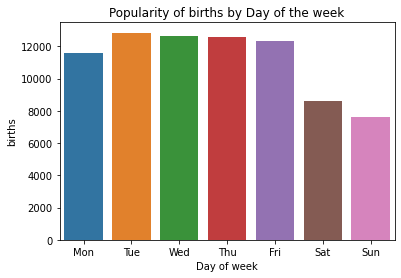

In [32]:
#plotting a bar plot representing the average births for each day of the week
ax = sns.barplot(x="day_of_week", y="births", data=Avg_births_per_day_of_week)
plt.xlabel("Day of week")
plt.title("Popularity of births by Day of the week")
figure = plt.gcf()
figure.savefig("Images/births_per_day_of_week.png")
plt.show()

Magnificiento!!
I then intend to determine the skewness of the data, by analyzing its distribution using a histogram.

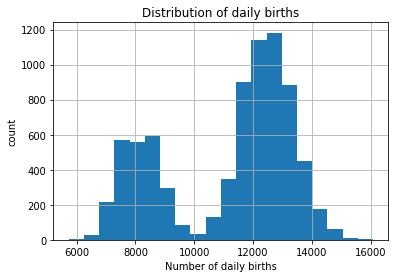

In [34]:
ax = US_births["births"].hist(bins=20)
plt.xlabel("Number of daily births")
plt.ylabel("count")
plt.title("Distribution of daily births")
figure = plt.gcf()
figure.savefig("Images/distribution_of_daily_births.png")
plt.show()

Lastly, I would create a strip plot to analyse the distribution of births for each month.

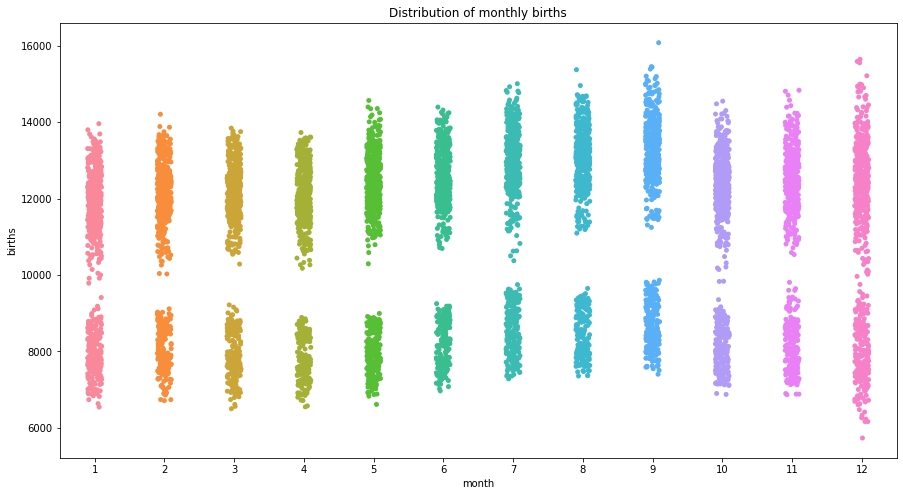

In [37]:
ax = sns.stripplot(y="births", x = "month", data=US_births) #plotting the strip plot
figure = plt.gcf() #Getting the current plot
figure.set_size_inches(15, 8) #adjusting the figure size
plt.title("Distribution of monthly births")
figure.savefig("Images/Distribution_of_monthly_births.png")
plt.show()

Beautiful!!
Of all the months, December has the widest range of daily births.

<a id="conclusion"></a>
### Conclusion

#### Insights
Below are some of the insights that i have gained from the analysis;

1.)	  September appeared to be the most popular birth month, having nine out of the ten most popular birth dates. With these nine birth dates all occurring between the second and third weeks, three of which are September 9, September 19, and September 12. Following a customary gestation period of 266 days, in theory, many of those babies would have been conceived on December 17, December 27, and December 20 respectively. This therefore shows that more babies are usually conceived during holiday periods, because people tend to have more time for baby-making during these periods (their time off from work, studies etc.).

2.)	  It can also be observed that births seem less likely to occur during holidays, and on weekends. This is proven by the fact that, all the five least popular birth dates fall within holiday periods; Boxing day, Thanksgiving, New year's day, Christmas eve, and Christmas day, and fewer births occur on Saturdays and Sundays. One reason for this is that, almost no cesarean births are scheduled      by doctors to happen on public holidays and weekends. And studies show that about one in three American babies are born through cesarean sections. Another reason may be that, if doctors plan to induce an expectant mother into labour, they do not schedule it for holiday periods or weekends. Also, doctors may be asked to induce labour on the run up to public holidays like Christmas etc.

3.)   A point to note is that, an analysis on the distribution of daily births shows that the data is left-skewed. This is because the mean number of daily births is less than the most occurring number of daily births which is around 12, 300.



[Visit my linkedin profile](https://www.linkedin.com/abasifreke-nkanang-775a22229)

[Visit my Tableau public profile](https://public.tableau.com/app/profile/abasifreke.nkanang)
